In [34]:
import pandas as pd
import numpy as np
import math

In [45]:
error = pd.read_csv('errors.csv')

In [46]:
error.head(5)

,SNo,Options,Error
0,1,['Golmaal is one of the funniest movies.'],No error found
1,2,['Golmaal is one between the funniest movies.'],No error found
2,3,['Golmaal is one of the funny movies.'],No error found
3,4,['Golmaal is first of the funniest movies.'],No error found
4,5,['I am feel better.'],Incorrect verb form


In [47]:
error.fillna(' ', inplace = True)

In [53]:
error_1 = error[error['Error'] != 'No error found']

In [54]:
error_1.head()

,SNo,Options,Error
4,5,['I am feel better.'],Incorrect verb form
11,12,['I am steal feeling a bit under the weather.'],Possibly confused word
13,14,['Take care of your.'],Incorrect possessive form
14,15,['Take care of you.'],Confused pronoun
15,16,['Takes care of yourself.'],Missing subject


In [29]:
p = error[error['Error'] != 'No error found']

TypeError: string indices must be integers

In [48]:
errors = error['Error']

In [41]:
for error in errors:
    if type(error) != type('Ashu'):
        print(error)

nan
nan
nan
nan
nan


In [42]:
errors = np.array(errors)

In [12]:
errors = str(errors)

In [49]:
unique_errors, unique_error_counts = np.unique(errors, return_counts=True)

In [50]:
unique_error_counts

array([   5,    8,    2,    1,   67,    6,    1,    1,    8,    2,    6,
         10,    5,   15,    7,    2,   22,    6,    1,    2,    8,    2,
          4,    4,    1,    3,    2,    4,   13,  172,   57,    2,   92,
         50,    8,   85,   19,   33,    5,    2,    3,   13,   11,    2,
         10,   12,   54,    1,    1,    2,  108,   23,    7,   54,    6,
          1,    4,    3,   10,   13,    2,   34,    5,  127,    3, 2545,
         12,    3,    3,    1,    1,    1,    1,  153,    4,    5,    1,
          1,    2,    1,    2,    1,    2,    1,    5,    5,    3,   56,
          1,    1,    1,    2,    1,    2,    2,   25,   14,    2,    4,
          3,   16,    2,    2,   24,    8,   10,    2,    1,    8,    7,
          3,    4,    8,    3,    7,   13,    2,    1,    1,    1,    1,
          1,    3,    6,   25])

In [52]:
unique_errors

array([' ', 'Adverb instead of adjective', 'Capitalization',
       'Confused possessive and contraction', 'Confused preposition',
       'Confused pronoun', 'Confused which and who',
       'Confused “each” and “every”', 'Do with modal verb',
       'Double comparative', 'Double negative', 'Empty phrases',
       'Gerund instead of to-infinitive', 'Incomplete comparison',
       'Inconsistent spelling', 'Incorrect adverb placement',
       'Incorrect article use', 'Incorrect compound superlative',
       'Incorrect form for to-infinitive', 'Incorrect negative verb form',
       'Incorrect possessive form',
       'Incorrect preposition after adjective',
       'Incorrect punctuation with quotation mark',
       'Incorrect quantifier',
       'Incorrect quantifier with uncountable noun',
       'Incorrect spacing with punctuation',
       'Incorrect usage of reflexive pronoun',
       'Incorrect use of progressive tense', 'Incorrect verb',
       'Incorrect verb form', 'Incorrect verb 

In [51]:
index = np.where(unique_errors == 'No error found')
unique_errors = np.delete(unique_errors, index)
unique_error_counts = np.delete(unique_error_counts, index)

In [56]:
import matplotlib.pyplot as plt

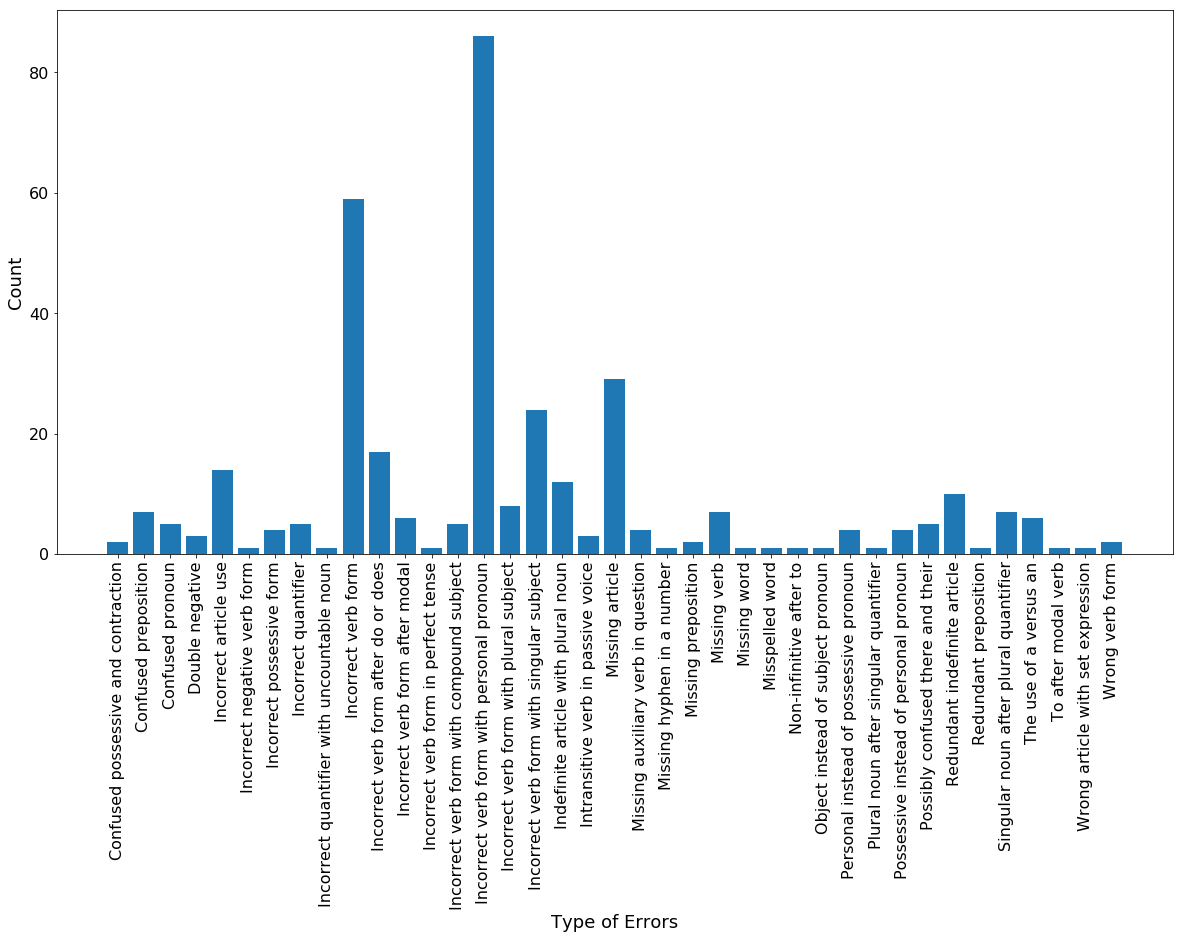

In [52]:
fig = plt.figure(figsize=(20,10))
plt.bar(unique_errors, unique_error_counts)
plt.xlabel('Type of Errors', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.tick_params(labelsize=16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('errors_plot.png')

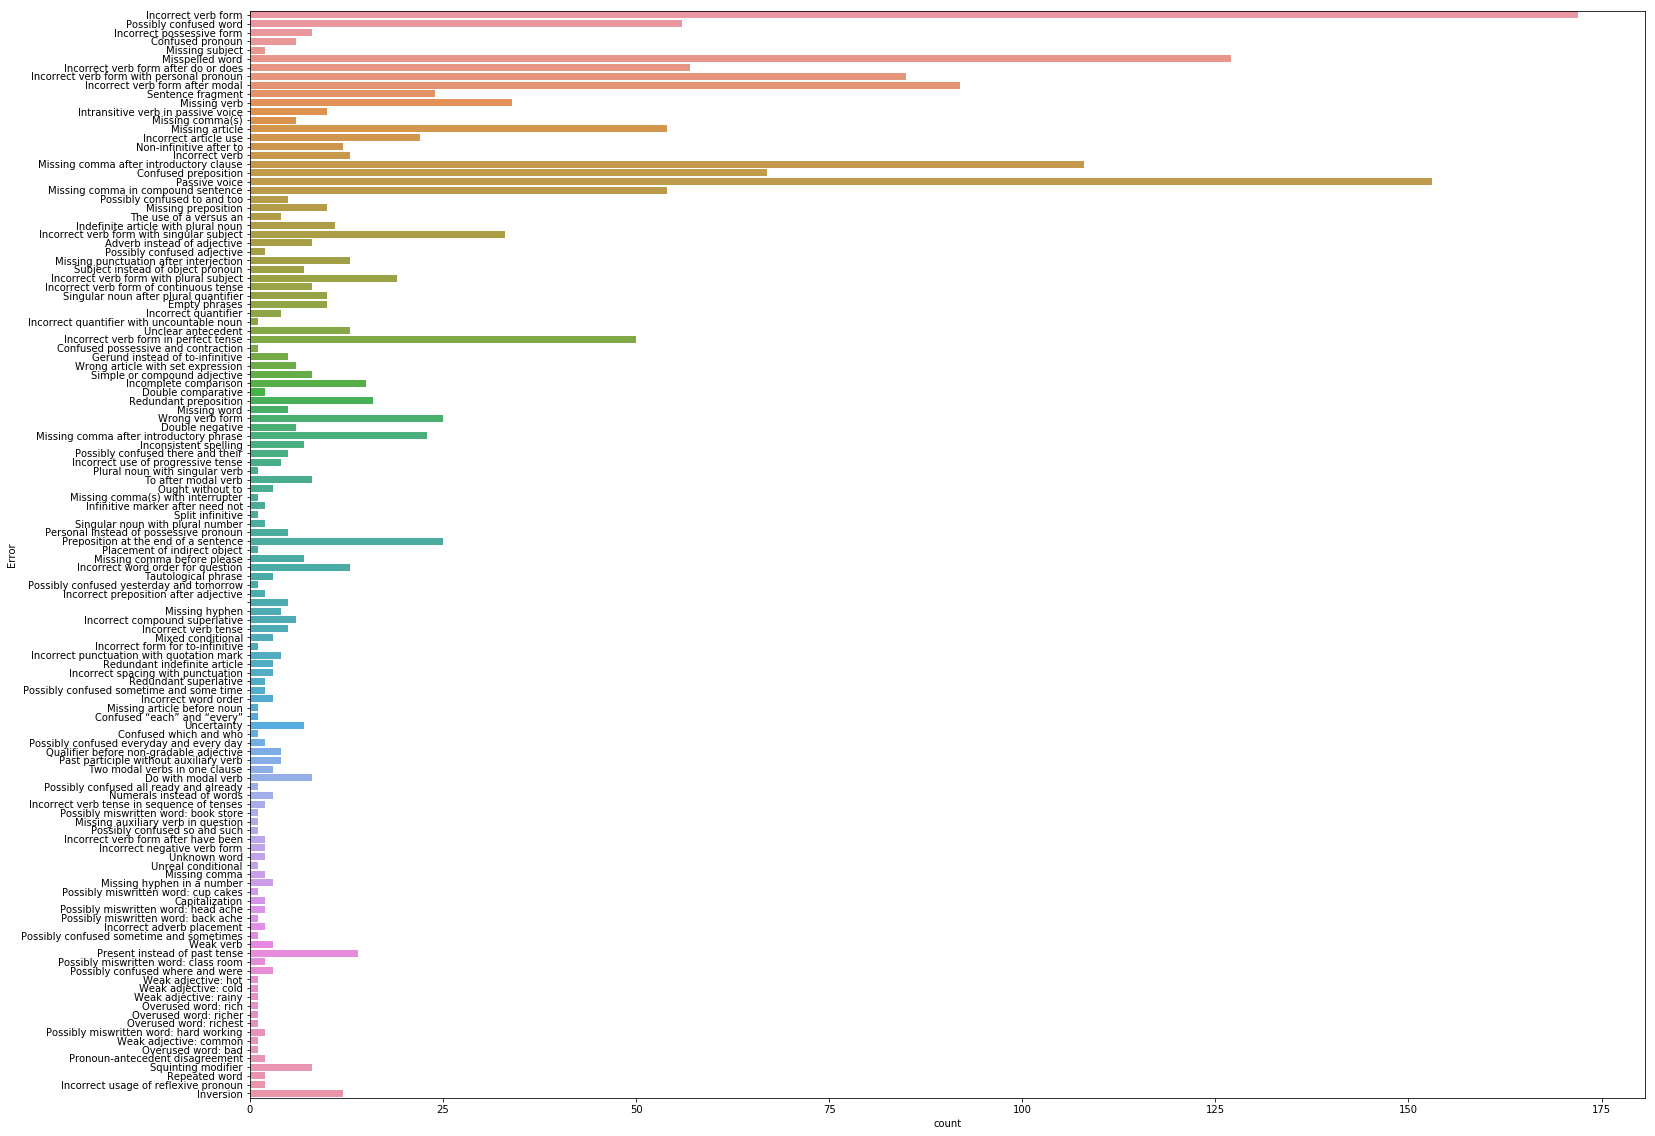

In [57]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,20))
sns.set(style="darkgrid")
sns_plot = sns.countplot(ax=ax, y="Error", data=error_1)
fig = sns_plot.get_figure()
fig.savefig('output.png') 

In [65]:
error.head()

,Options,Error
0,'Golmaal is one of the funniest movies.',No error found
1,'Golmaal is one between the funniest movies.',No error found
2,'Golmaal is one of the funny movies.',No error found
3,'Golmaal is first of the funniest movies.',No error found
4,'I am feel better.',Incorrect verb form


In [59]:
error.drop(['SNo'], axis = 1, inplace= True)

In [64]:
error.tail()

,Options,Error
4273,'She got presents then it was her birthday.',No error found
4274,'We came in early today because we had a meeti...,No error found
4275,'We came in early today so we had a meeting.',Missing comma in compound sentence
4276,'We came in early today but we had a meeting.',Missing comma in compound sentence
4277,"""We came in early today that''s why we had a m...",Misspelled word


In [61]:
def exp(text):
    return text[text.find("\[\"|\'")+1:text.find("'|\"]")][1:]

In [62]:
exp(error['Options'][956])

'"He didn\'t go to school. Or his sister didn\'t (go)."'

In [63]:
error['Options'] = error['Options'].apply(exp)

In [66]:
error.to_excel('error_complete_choose_4.xlsx')